In [54]:
import pandas as pd
import pypsa
import matplotlib.pyplot as plt

In [177]:
n= pypsa.Network("/media/pklein/Data/Shared Github/pypsa-za2/results/ME IRP 2024/CNS_G_RNZ_CB_UC/dispatch-2030-solved.nc")

INFO:pypsa.io:Imported network dispatch-2030-solved.nc has buses, carriers, generators, loads, storage_units


In [178]:
df = n.buses_t.marginal_price

In [181]:
n.generators_t.p["RSA-load_shedding"].sum()/1000

768.797213845997

In [123]:
n2 = pypsa.Network("/media/pklein/Data/Shared Github/pypsa-za2/results/ME IRP 2024/network/capacity-CNS_G_RNZ_CB_UC.nc")

INFO:pypsa.io:Imported network capacity-CNS_G_RNZ_CB_UC.nc has buses, carriers, generators, loads, storage_units


In [ ]:
n2.generators_t

(0.0, 3500.0)

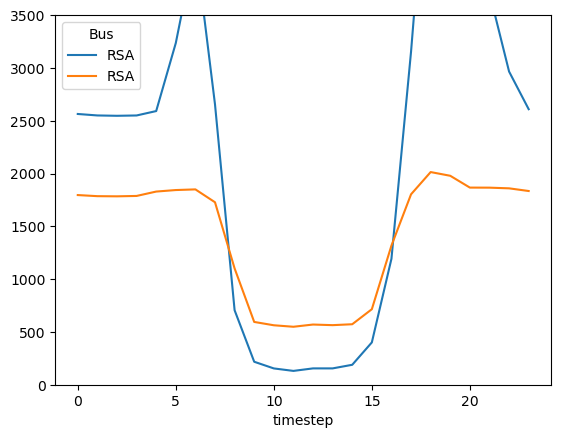

In [182]:
mp=n.buses_t.marginal_price
mp[mp>10000]=10000
ax = mp.groupby(mp.index.hour).mean().plot()

mp2=n2.buses_t.marginal_price.loc[2030]
mp2[mp2>10000]=10000

mp2.groupby(mp2.index.hour).mean().plot(ax=ax)
plt.ylim(0,3500)

In [183]:
n.generators_t.p_min_pu["Arnot"]

snapshot
2030-01-01 00:00:00    0.216704
2030-01-01 01:00:00    0.217362
2030-01-01 02:00:00    0.218020
2030-01-01 03:00:00    0.218678
2030-01-01 04:00:00    0.219336
                         ...   
2030-12-31 19:00:00    0.204837
2030-12-31 20:00:00    0.204837
2030-12-31 21:00:00    0.204837
2030-12-31 22:00:00    0.204837
2030-12-31 23:00:00    0.204837
Name: Arnot, Length: 8760, dtype: float64

(525960.0, 530280.0)

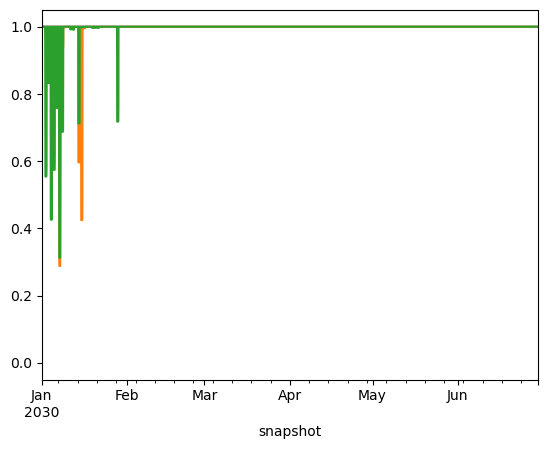

In [185]:
n.generators_t.status["Arnot"].plot()
n.generators_t.status["Kusile"].plot()
n.generators_t.status["Medupi"].plot()
plt.xlim("2030-01","2030-06-30")

<AxesSubplot:xlabel='snapshot'>

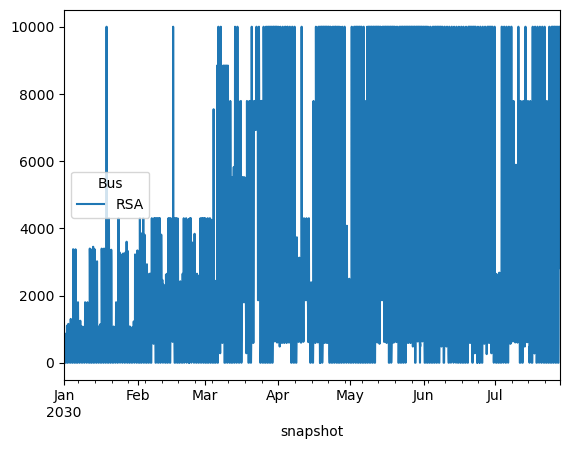

In [187]:
n.buses_t.marginal_price.iloc[:5000].plot()

<AxesSubplot:xlabel='snapshot'>

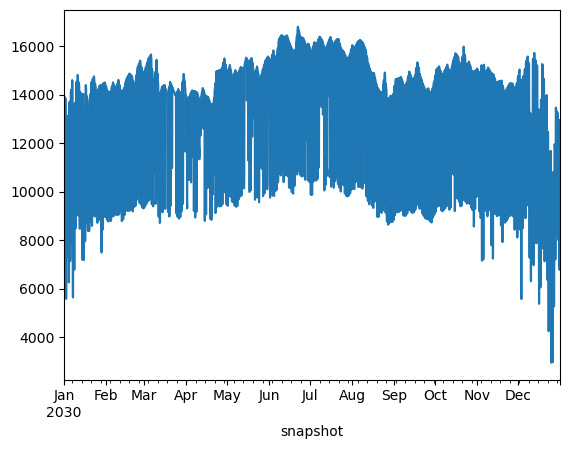

In [189]:
n.generators_t.p[n.generators[n.generators.carrier=="coal"].index].sum(axis=1).plot()

<AxesSubplot:xlabel='snapshot'>

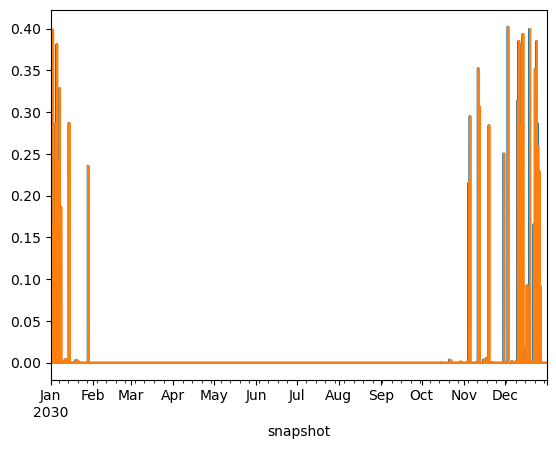

In [192]:
n.generators_t.shut_down["Medupi"].loc["2030"].plot()
n.generators_t.start_up["Medupi"].loc["2030"].plot()

In [203]:
n.generators.query("carrier=='ocgt_gas'")

,bus,carrier,lifetime,build_year,p_nom,efficiency,ramp_limit_up,ramp_limit_down,marginal_cost,capital_cost,...,p_nom_max,p_max_pu,p_set,q_set,sign,marginal_cost_quadratic,stand_by_cost,up_time_before,down_time_before,weight
Generator,,,,,,,,,,,,,,,,,,,,,
RSA-ocgt_gas-2030,RSA,ocgt_gas,30.0,2030,3071.509128,0.380831,NaN,NaN,2648.74335,1.163603e+06,...,inf,1.0,0.0,0.0,1.0,0.0,0.0,1,0,1.0


<AxesSubplot:xlabel='snapshot'>

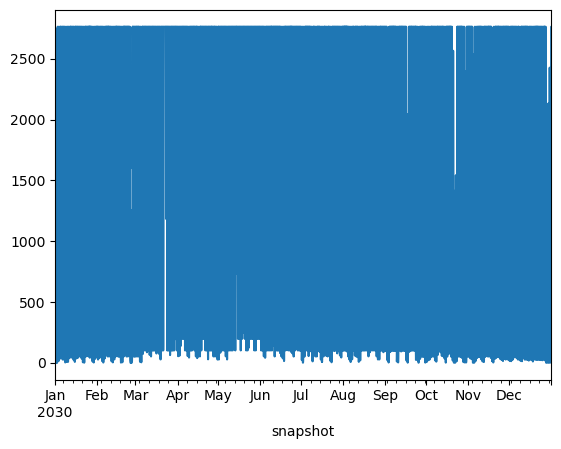

In [196]:
g = "RSA-ocgt_gas-2030"
n.generators_t.p[g].plot()


#(-n.generators_t.shut_down[g]).plot()
#n.generators_t.status[g].diff().plot()

In [115]:
n.generators_t.start_up.sum()

Generator
Arnot                   27.060632
Duvha                   50.329170
Kendal                  41.576688
Kriel                   32.775236
Kusile                  44.433311
Lethabo                 37.834626
Majuba                  34.037386
Matimba                 47.994449
Matla                   52.576067
Medupi                  40.621813
Tutuka                  30.810429
Koeberg                  0.009260
RSA-ccgt_steam-2030    449.916834
RSA-coal-2030          352.924350
dtype: float64